# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


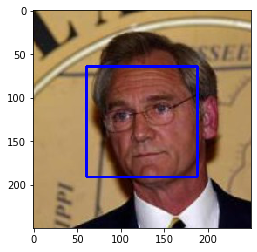

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

100% of the first 100 images in human_files have a human face detected in them.  
8% of the first 100 images in dog_files have a human face detected in them.


In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_in_human_images = 0
for human_file in tqdm(human_files_short):
    face_detected = face_detector(human_file)
    if face_detected:
        human_in_human_images += 1

human_in_dog_images = 0
for dog_file in tqdm(dog_files_short):
    face_detected = face_detector(dog_file)
    if face_detected:
        human_in_dog_images += 1

print("\n{}% of the first 100 images in human_files have a human face detected ".format(human_in_human_images))
print("\n{}% of the first 100 images in dog_files have a human face detected ".format(human_in_dog_images))

100%|██████████| 100/100 [00:11<00:00,  8.76it/s]
100% of the first 100 images in human_files have a human face detected 

8% of the first 100 images in dog_files have a human face detected 



We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

trans = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), normalize])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # Data loading code
    im = Image.open(img_path)
    im = trans(im).unsqueeze_(0)

    if use_cuda:
        im = im.cuda()

    logits = VGG16(im)
    c = logits.argmax().cpu().numpy()
    return c # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    c = VGG16_predict(img_path)
    return 151 <= c <=268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Using the VGG16:
1% of the first 100 images in human_files have a dog detected in them.  
100% of the first 100 images in dog_files have a dog detected in them.


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_in_human_images = 0
for human_file in tqdm(human_files_short):
    dog_detected = dog_detector(human_file)
    if dog_detected:
        dog_in_human_images += 1

dog_in_dog_images = 0
for dog_file in tqdm(dog_files_short):
    dog_detected = dog_detector(dog_file)
    if dog_detected:
        dog_in_dog_images += 1

print("\n{}% of the first 100 images in human_files have a dog detected using VGG16".format(dog_in_human_images))
print("\n{}% of the first 100 images in dog_files have a dog detected using VGG16".format(dog_in_dog_images))

100%|██████████| 100/100 [00:02<00:00, 42.58it/s]
1% of the first 100 images in human_files have a dog detected using VGG16

100% of the first 100 images in dog_files have a dog detected using VGG16



We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

MNASNet = models.mnasnet1_0(pretrained=True)
MNASNet.eval()
use_cuda = torch.cuda.is_available()
if use_cuda:
    MNASNet = MNASNet.cuda()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
trans = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), normalize])

def MNASNet_predict(img_path):
    im = Image.open(img_path)
    im = trans(im).unsqueeze_(0)
    if use_cuda:
        im = im.cuda()
    logits = MNASNet(im)   
    c = logits.argmax().cpu().numpy()
    return c # predicted class index

def MNASNet_dog_detector(img_path):
    c = MNASNet_predict(img_path)
    return 151 <= c <=268 # true/false

dog_in_human_images = 0
for human_file in tqdm(human_files_short):
    dog_detected = MNASNet_dog_detector(human_file)
    if dog_detected:
        dog_in_human_images += 1

dog_in_dog_images = 0
for dog_file in tqdm(dog_files_short):
    dog_detected = MNASNet_dog_detector(dog_file)
    if dog_detected:
        dog_in_dog_images += 1

print("\n\n{}% of the first 100 images in human_files have a dog detected using MNASNet".format(dog_in_human_images))
print("{}% of the first 100 images in dog_files have a dog detected using MNASNet".format(dog_in_dog_images))

100%|██████████| 100/100 [00:01<00:00, 51.92it/s]

1% of the first 100 images in human_files have a dog detected using MNASNet
100% of the first 100 images in dog_files have a dog detected using MNASNet



---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Data loading code
# taken from pytorch imagenet example
batch_size = 32
num_workers = 8

traindir = './dogImages/train'
valdir = './dogImages/valid'
testdir = './dogImages/test'
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.RandomSizedCrop(144),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=True,
    num_workers=num_workers, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Resize(144),
        transforms.CenterCrop(144),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transforms.Compose([
        transforms.Resize(144),
        transforms.CenterCrop(144),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True)

loaders_scratch = {'train': train_loader, 'valid': val_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Initially, I resized the images to size 84 pixels, as I did not have much processing power in my local computer and was worried about image sizes. After a few trials, I increased the size to 144 pixels.  

For the test and validation data, I am just resizing (scaling) the images to the desired value and cropping the center which crops the larger dimention to match the smaller one. For the training data I chose to do a `randomResizeCrop` which is equivalent to random translation, random resize, and a crop from the center with the desired size. In addition I did a random horizontal flip. I decided against the random rotation, as I have heard CNN modules are not robust against rotation, and I fear rotation will cause more issues than benefits. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, dropout=0.2):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.num_classes = 133
        conv_layers = [
            nn.Conv2d(3, 16, 3, padding=1, stride=2, bias=True), #144x144 to 72x72
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 32, 5, padding=2, stride=2, bias=True), #72x72 to 36x36
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, 7, padding=3, stride=2, bias=True), #18x18 to 18x18
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 5, padding=2, stride=2, bias=True), #18x18 to 9x9
            nn.Dropout(p=dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 5, padding=2, stride=2, bias=True), #9x9 to 5x5
            nn.ReLU(inplace=True),
        ]
        self.conv_layers = nn.Sequential(*conv_layers)
        self.classifier = nn.Sequential(nn.Dropout(p=dropout),
                                        nn.Linear(5*5*128, self.num_classes))

    def forward(self, x):
        ## Define forward behavior
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I started with a relatively small network with 4 conv2D layers and one fully connected layer with ReLU after each convolution layer. The input image size was 3x84x84 and final convolution layer size was 64x6x6. While training this network, the training loss was decreasing properly. The validation loss initially decreased, but started to increase after few iterations. I suspected the issue to be related to not having any form of reguralization to prevent overfitting.
Hence, I included a dropout layer after the last convolution layer and trained the network again. This time the training loss although decreasing did not reach the same low value as the previous case without dropout. However, the validation loss reached lower values. I tried this network on the test dataset and achieved an accuracy of 19%. 

I then tried larger input size of 144x144, but kept the number of layers and convolution filter sizes the same. I changed the strides a bit so that the final flattened feature vector is still manageable. This change resulted in better training and validation loss, but unfortunately the test acuracy dropped to 15%.

Finally, I susspected the large strides might be the culprit, so I added one more convolution layer, and reduced all strides back to 2. I also added another dropout layer in the 4th convolution layer, resulting in the network architecture of above. This yeilded much better training and validation losses with a test accuracy of 26%


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        best_valid_loss = None
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            prediction = model(data)
            loss = criterion(prediction, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            with torch.no_grad():
                train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                prediction = model(data)
                loss = criterion(prediction, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if best_valid_loss is None or valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.855886 	Validation Loss: 4.779781
Epoch: 2 	Training Loss: 4.702492 	Validation Loss: 4.548821
Epoch: 3 	Training Loss: 4.563905 	Validation Loss: 4.439174
Epoch: 4 	Training Loss: 4.468136 	Validation Loss: 4.337204
Epoch: 5 	Training Loss: 4.384983 	Validation Loss: 4.267466
Epoch: 6 	Training Loss: 4.331691 	Validation Loss: 4.206768
Epoch: 7 	Training Loss: 4.265296 	Validation Loss: 4.155505
Epoch: 8 	Training Loss: 4.215751 	Validation Loss: 4.148366
Epoch: 9 	Training Loss: 4.159739 	Validation Loss: 4.085904
Epoch: 10 	Training Loss: 4.104896 	Validation Loss: 4.018635
Epoch: 11 	Training Loss: 4.076328 	Validation Loss: 4.042546
Epoch: 12 	Training Loss: 4.007067 	Validation Loss: 4.039418
Epoch: 13 	Training Loss: 3.953998 	Validation Loss: 3.967055
Epoch: 14 	Training Loss: 3.910558 	Validation Loss: 3.889993
Epoch: 15 	Training Loss: 3.887816 	Validation Loss: 3.849693
Epoch: 16 	Training Loss: 3.839242 	Validation Loss: 3.881636
Epoch: 17 	Traini

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.229223


Test Accuracy: 27% (226/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [26]:
## TODO: Specify data loaders
import os
from torchvision import datasets

# Data loading code
# with inspiration from pytorch imagenet example and the response from this community question https://knowledge.udacity.com/questions/27238
batch_size = 32
num_workers = 8

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_transform = transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])
train_data = datasets.ImageFolder('./dogImages/train', train_transform)
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])
valid_data = datasets.ImageFolder('./dogImages/valid', test_transform)
test_data = datasets.ImageFolder('./dogImages/test', test_transform)

data_transfer = {"train" : train_data, "valid" : valid_data, "test" : test_data}

train_loader_mnasnet = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size, shuffle=True,
    num_workers=num_workers, pin_memory=True)

val_loader_mnasnet = torch.utils.data.DataLoader(
    valid_data,
    batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True)

test_loader_mnasnet = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=True)

loaders_transfer = {'train': train_loader_mnasnet, 'valid': val_loader_mnasnet, 'test': test_loader_mnasnet}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [27]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.mnasnet1_0(pretrained=True)
for param in model_transfer.layers.parameters():
    param.requires_grad = False
model_transfer.classifier = nn.Sequential(nn.Dropout(0.2), nn.Linear(1280, 133))

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I chose one of the smaller models in the torchvision library that had good performance. MNASNet is a model designed for mobile devices so it has small size and had relatively good performance.  
I printed the MNASNet architecture and it had a number of convolution layers named `layers`, and one fully connected layer named `classifier`. I disabled the calculation of gradients for the parameters of the `layers`, and replaced the `classifier` with a new layer matching the new number of classes for this problem. I kept the dropout layer from the original MNASNet `classifier` layer.


This model is originally trained on imagenet data which is also a classification problem from images. Therefore the convolution layers are properly tuned to extract relevant features from RGB image inputs. So we should freeze the the convolution layers. However, the last fully connected layer is trained for the 1000 classes of the imagenet, and it is not usefull for this problem. so we replace that with a new fully connected layer that matches the number of classes for our problem. The weights for this `classifier` layer are reinitialized and trained using the new dataset. 

As mentioned above, the original model is a classification model trained for RGB images which makes it a good candidate for our problem. Since this model has achieved relatively good performance (26.49% error) for a 1000 class problem, I expect it to have at least similar performance in this dog breed classifier problem that has less number of classes and exceed the 60% accuracy threshold. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# train the model
n_epochs = 0
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.751275


Test Accuracy: 79% (661/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [21]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    im = Image.open(img_path)
    im = test_transform(im).unsqueeze_(0)
    if use_cuda:
        im = im.cuda()
    logits = model_transfer(im)   
    c = logits.argmax().cpu().numpy()

    return class_names[c]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [22]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if MNASNet_dog_detector(img_path):
        print("hello, dog!")
        dog_breed = predict_breed_transfer(img_path)
        im = Image.open(img_path)
        plt.imshow(im)
        plt.show()
        print("you are a {}\n".format(dog_breed))
    elif face_detector(img_path):
        print("hello, human!")
        human_breed = predict_breed_transfer(img_path)
        im = Image.open(img_path)
        plt.imshow(im)
        plt.show()
        print("you look like a ... ")
        print("{}\n".format(human_breed))
    else:
        print("error: niether dog nor face detected in the image\n")
        im = Image.open(img_path)
        plt.imshow(im)
        plt.show()
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I expected the algortihm to perform fairly well. That being said, it is slightly better than my expectation. Considering that the original classifier is trained for imagenet where different dog breeds are part of the classes, the original classifier is able to classify dog breeds. Given that the number of classes in the dog breed problem are lower than the imagenet, I expected the performance of the model on dog breed dataset be higher than imagenet performance. The accuracy of model on imagenet is reported as 63.5%. I was expecting performance to be above 70%, but after training it achieved around 80% performance on the test set.

Possible improvements:  
- instead of using different functions for detecting human faces and dogs, we can train a single model with three classes (dog, human face, other) to directly classify dog, human face, or other obejcts. Note that we need to have human face mages as well as images of other objects included in the data set for training and testing the model.
- We can try to inject some expert knowledge into our classifier and classigy the dog breeds in a tree structure. Let say we divide the dogs into major categories and then each major category is divided further into its detailed dog breed. From a model perspective, we add another classifier layer after the last layer with outputs matching the number of major categories. We will consider a loss for this layer as well and combine it with the loss from detailed dog breed classifier layer. We can assign a larger weight to this loss, so that the model first learns to classify the major category and then learn the detailed dog breed.
- given that original model_transfer already classifies dog breeds for imagenet, it is possible to not replace the whole fully connected layer and just cut the weights for dog breed section and further train those weights. It should be done caregully though as the number of classes and class indexes from imagenet should be properly reordered and matched our dog breed classifier classes. extra classes not present in imagenet need to be randomly initialized. 
 

error: niether dog nor face detected in the image



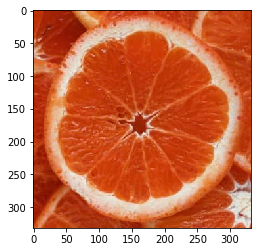

error: niether dog nor face detected in the image



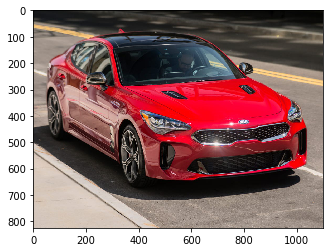

error: niether dog nor face detected in the image



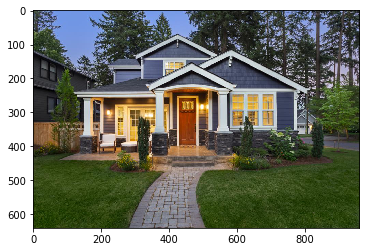

hello, dog!


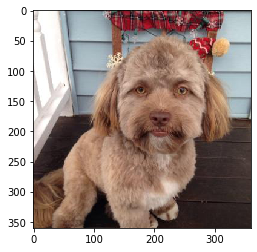

you are a Havanese

hello, dog!


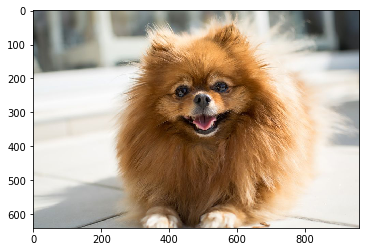

you are a Pomeranian

hello, dog!


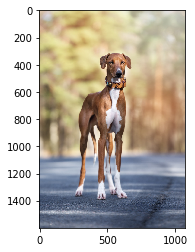

you are a Boxer

hello, human!


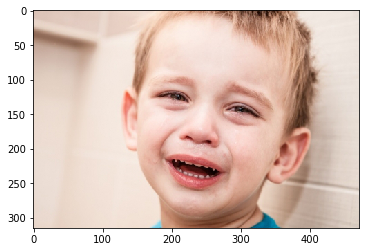

you look like a ... 
Saint bernard

hello, dog!


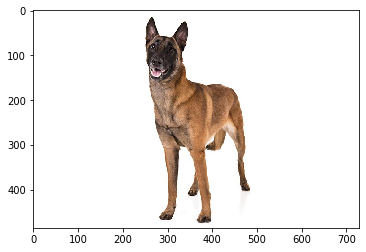

you are a Belgian malinois

hello, human!


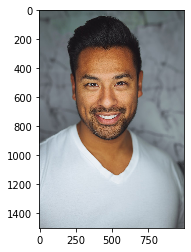

you look like a ... 
Bull terrier

hello, dog!


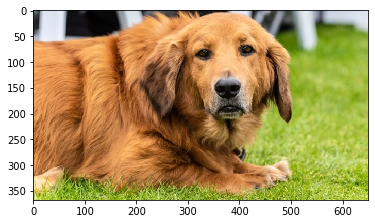

you are a Golden retriever

error: niether dog nor face detected in the image



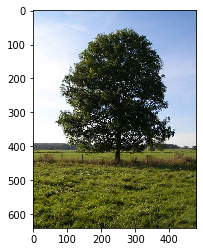

error: niether dog nor face detected in the image



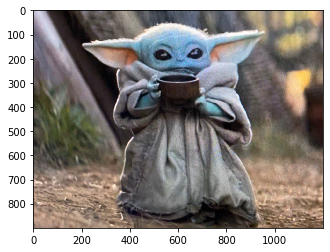

hello, dog!


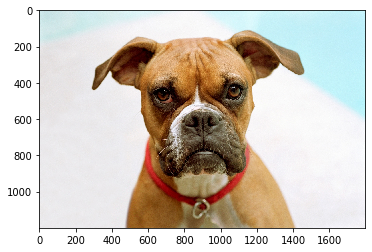

you are a Boxer

hello, human!


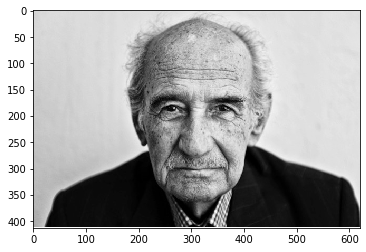

you look like a ... 
Dogue de bordeaux

hello, human!


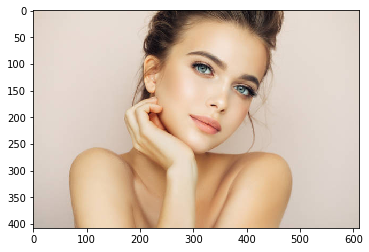

you look like a ... 
Norwegian lundehund

error: niether dog nor face detected in the image



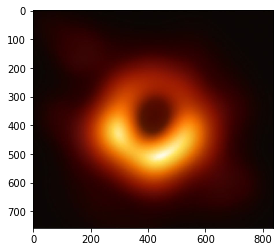

In [25]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
# for file in np.hstack((human_files[:3], dog_files[:3])):
for file in np.array(glob("sample_images/*")):
    run_app(file)    